1 . We have the min and max temperatures in a city in India for each months of the year. We would like to find a function to 
describe this and show it geographically, the dataset given below:
    
    Task:
        1. Fitting it to the periodic function.
        2. Plot the fit.
    
    Data
    Max = 39,41,43,47,49,51,45,38,37,29,27,25
    Min = 21,23,27,28,32,35,31,28,21,19,17,18

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [2]:
month = np.linspace(1,12,12)

Max =  [39,41,43,47,49,51,45,38,37,29,27,25]
Min =  [21,23,27,28,32,35,31,28,21,19,17,18]

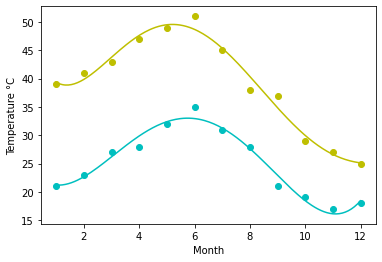

In [3]:
#METHOD 1: Using numpy.polyfit 

p1 = np.poly1d(np.polyfit(month, Max,5))
p2 = np.poly1d(np.polyfit(month, Min,4))

t = np.linspace(1, 12, 200)

plt.plot(month, Max, 'yo', t, p1(t), 'y-')
plt.plot(month, Min, 'co', t, p2(t), 'c-')

plt.xlabel("Month")
plt.ylabel('Temperature °C')

plt.show()

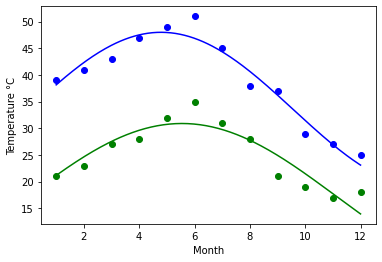

In [4]:
#METHOD 2: using scipy.optimize.curve_fit

def test( x, a, b, c): 
    return  a * np.sin(b * x) + c

t = np.linspace(1, 12, 200)
param1, param_cov1 = curve_fit(test, month, Max, p0 = [8,0.23,37])  
param2, param_cov2 = curve_fit(test, month, Min, p0 = [-0.5, 0.3, 15])


plt.plot(month, Max, 'bo', t, test(t,*param1), 'b-')
plt.plot(month, Min, 'go',t,test(t,*param2), 'g-')

plt.xlabel("Month")
plt.ylabel('Temperature °C')

plt.show()

2. This assignment is for visualization using matplotlib:

data to use:
        url = https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv

Charts to plot:
    1. Create a pie chart presenting the male/female proportion.
    2. Create a scatterplot with fare paid and the age, differ the plot color by gender.   

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


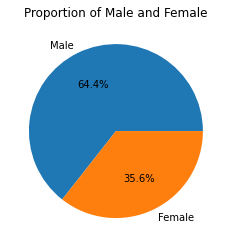

In [7]:
plt.pie(df['sex'].value_counts(), labels = ['Male','Female'], autopct='%2.1f%%')
plt.title("Proportion of Male and Female")
plt.show()

In [8]:
# Here the column sex in titanic dataset has two values, either 'male' or 'female'
# Firstly the sex column is converted to categorical[codes] column so that the two values turn to codes.

df['sex'] = df['sex'].astype('category').cat.codes

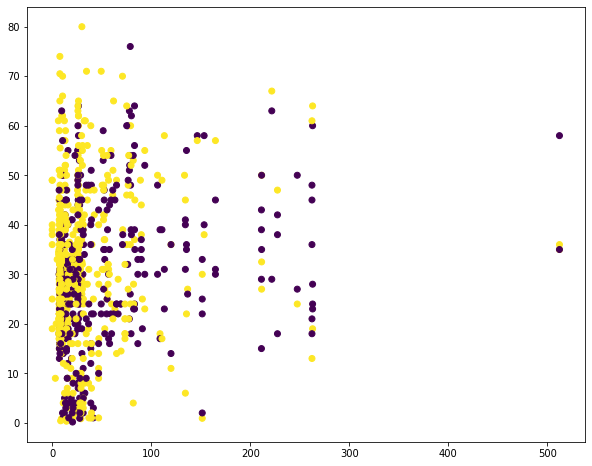

In [11]:
plt.figure(figsize = (10,8))
plt.scatter(df['fare'], df['age'], c = df['sex'])
plt.show()